In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Housing.csv")

In [3]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
print(df.isnull().sum())

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
5,10850000,7500,3,3,1,2,True,False,True,False,True,True,True,False
6,10150000,8580,4,3,4,2,True,False,False,False,True,True,True,False
7,10150000,16200,5,3,2,0,True,False,False,False,False,False,False,True
8,9870000,8100,4,1,2,2,True,True,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,True,True,False,False,True,True,False,True


In [11]:
# 2. Convert True/False to 1/0
df.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-4266135554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace=True)


In [12]:
# 3. Features and Target
X = df.drop("price", axis=1)
y = df["price"]

In [13]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 5. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 6. Predictions and Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.6529


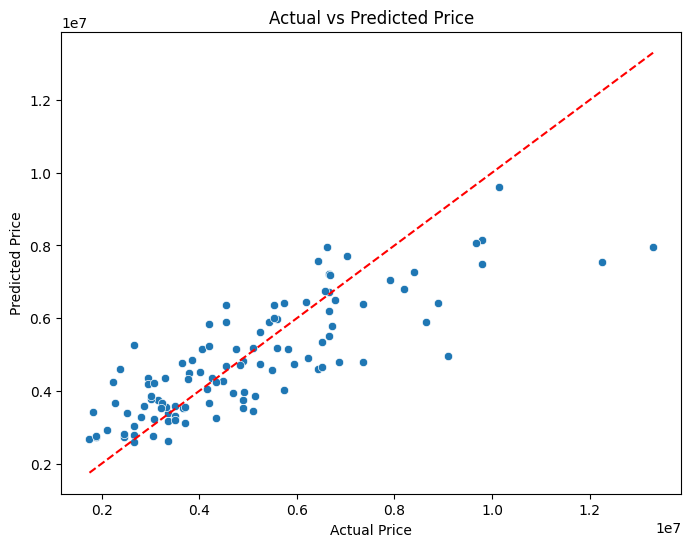

                                  Coefficient
bathrooms                        1.094445e+06
airconditioning_yes              7.914267e+05
hotwaterheating_yes              6.846499e+05
prefarea_yes                     6.298906e+05
stories                          4.074766e+05
basement_yes                     3.902512e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
parking                          2.248419e+05
bedrooms                         7.677870e+04
area                             2.359688e+02
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# 8. Show Coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coef_df.sort_values(by="Coefficient", ascending=False))

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.611918531405699


In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost R²: 0.5893071889877319


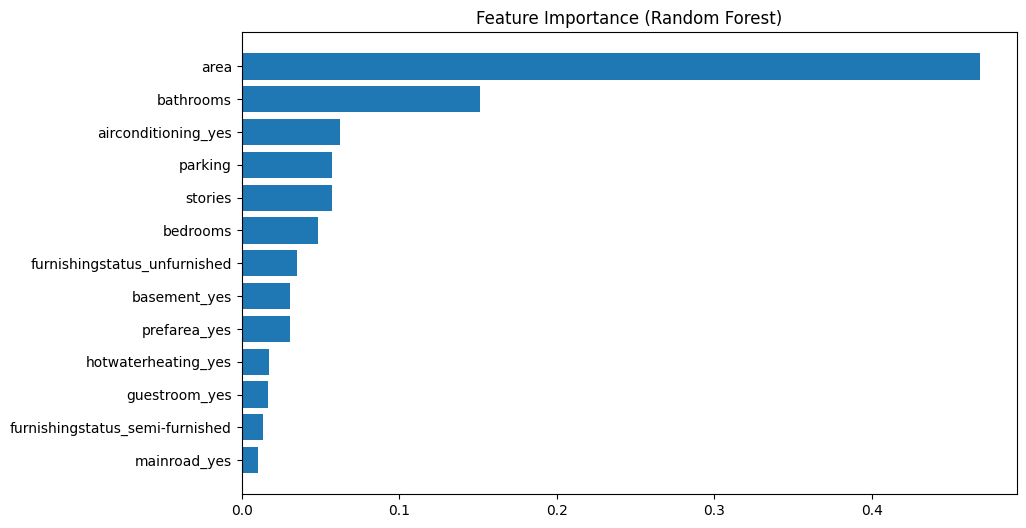

In [20]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10,6))
plt.barh(feat_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.show()


In [21]:
!pip install streamlit colabcode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard

In [22]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))


In [23]:
code = '''
import streamlit as st
import numpy as np
import pickle

model = pickle.load(open("model.pkl", "rb"))

st.title("🏠 House Price Prediction App")

area = st.number_input("Area (sq ft)", 500, 20000, 7500)
bedrooms = st.slider("Bedrooms", 1, 10, 3)
bathrooms = st.slider("Bathrooms", 1, 5, 2)
stories = st.slider("Stories", 1, 4, 2)
parking = st.slider("Parking (spots)", 0, 3, 1)

mainroad = st.checkbox("Has Main Road Access")
guestroom = st.checkbox("Guest Room Available")
basement = st.checkbox("Has Basement")
hotwater = st.checkbox("Hot Water Heating")
aircon = st.checkbox("Air Conditioning")
prefarea = st.checkbox("Preferred Area")

furnishing = st.selectbox("Furnishing Status", ["furnished", "semi-furnished", "unfurnished"])
semi = 1 if furnishing == "semi-furnished" else 0
unfurn = 1 if furnishing == "unfurnished" else 0

if st.button("Predict Price"):
    input_data = np.array([[area, bedrooms, bathrooms, stories, parking,
                            int(mainroad), int(guestroom), int(basement),
                            int(hotwater), int(aircon), int(prefarea),
                            semi, unfurn]])
    price = model.predict(input_data)[0]
    st.success(f"Estimated House Price: ₹{int(price):,}")
'''

# Write this code into a file
with open("app.py", "w") as f:
    f.write(code)


In [30]:
!pip install streamlit colabcode


In [33]:
!pip install gradio


In [35]:
from sklearn.linear_model import LinearRegression
import pandas as pd



# Assume all preprocessing is already done
X = df.drop("price", axis=1)
y = df["price"]

# Train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [36]:
import gradio as gr
import numpy as np

def predict_price(area, bedrooms, bathrooms, stories, parking,
                  mainroad, guestroom, basement, hotwater, aircon, prefarea,
                  furnishing):

    semi = 1 if furnishing == "semi-furnished" else 0
    unfurn = 1 if furnishing == "unfurnished" else 0

    input_data = np.array([[area, bedrooms, bathrooms, stories, parking,
                            int(mainroad), int(guestroom), int(basement),
                            int(hotwater), int(aircon), int(prefarea),
                            semi, unfurn]])

    price = model.predict(input_data)[0]
    return f"Estimated Price: ₹{int(price):,}"

iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Area (sq ft)", value=7500),
        gr.Slider(1, 10, value=3, label="Bedrooms"),
        gr.Slider(1, 5, value=2, label="Bathrooms"),
        gr.Slider(1, 4, value=2, label="Stories"),
        gr.Slider(0, 3, value=1, label="Parking Spots"),
        gr.Checkbox(label="Main Road Access"),
        gr.Checkbox(label="Guest Room Available"),
        gr.Checkbox(label="Has Basement"),
        gr.Checkbox(label="Hot Water Heating"),
        gr.Checkbox(label="Air Conditioning"),
        gr.Checkbox(label="Preferred Area"),
        gr.Radio(["furnished", "semi-furnished", "unfurnished"], label="Furnishing Status")
    ],
    outputs="text",
    title="🏠 House Price Predictor",
    description="Enter house details to predict estimated price."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dfdeb934fe310ee039.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
